In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [152]:
df = pd.read_excel('gmm_gut_check.xlsx')
df

product category                         name  rhett  link  \
0              Pringles  Classic                     Original     75    22   
1              Pringles  Classic                          Bbq     82    50   
2              Pringles  Classic           Sour Cream & Onion     92    81   
3              Pringles  Classic       Cheddar and Sour Cream     93    85   
4              Pringles  Classic               Cheddar Cheese     77    77   
..                  ...      ...                          ...    ...   ...   
187  Buffalo Wild Wings      Hot                          Hot     85    71   
188  Buffalo Wild Wings      Hot               Mango Habanero     87    69   
189  Buffalo Wild Wings      Hot                         Wild     77    68   
190  Buffalo Wild Wings     Wild                  Desert Heat     58    74   
191  Buffalo Wild Wings     Wild  New Blazin' Carolina Reaper     54    11   

     total  
0       97  
1      132  
2      173  
3      178  
4      154  
..     ...  
187    156  
188    156  
189    145  
190    132  
191     65  

[192 rows x 6 columns]

In [153]:
df_long = pd.melt(df, id_vars=['product','category','name'], value_vars=['rhett','link'], var_name='person', value_name='score')

df_with_item_no = (df
                   .groupby('product')
                   .apply(lambda d: d.assign(item_no=lambda d: list(range(len(d)))))
                   .reset_index(drop=True)
                  )
df_with_item_no_long = pd.melt(df_with_item_no, id_vars=['product','category','name','item_no'], value_vars=['rhett','link'], var_name='person', value_name='score')

### Product level

The totals are rhoughly consistent for the most part. The only strange one here is Pringles which has a huge spread of scores compared to the rest. 

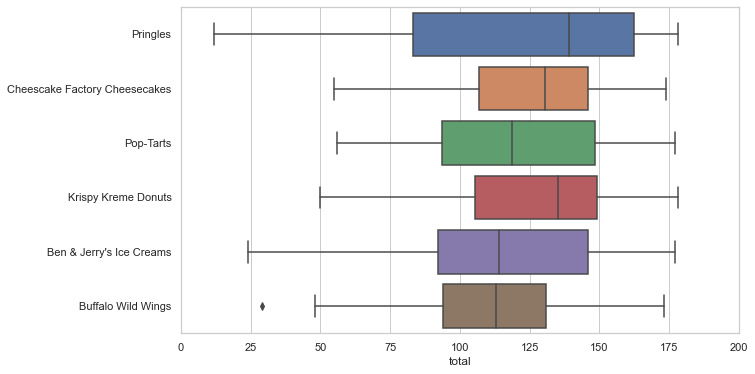

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, x='total', y='product', ax=ax)
ax.set(ylabel='', xlim=(0, 200));

Nothing surprising here. Rhett scores on average 13.5 more points than Link. Even breaking this down by product at worst (Pringles) Rhet still scores 10 points higher. 

Interestingly the product in which they disagreed the most is the wings episode (which gave me the idea to do this analysis in teh first place) and the numbers back this up with a 15.6 points difference.

In [155]:
(df
 [['rhett','link']]
 .mean()
 .diff(-1)
)

rhett    14.416667
link           NaN
dtype: float64

In [156]:
(df
 .groupby('product')
 [['rhett','link']]
 .mean()
 .diff(-1, axis=1)
)

rhett  link
product                                       
Ben & Jerry's Ice Creams       14.000000   NaN
Buffalo Wild Wings             15.629630   NaN
Cheescake Factory Cheesecakes  15.823529   NaN
Krispy Kreme Donuts            12.695652   NaN
Pop-Tarts                      13.718750   NaN
Pringles                       14.541667   NaN

In the detailed view of the product breakdown the high spread for Pingles is present for both Rhett and Link. No other surprises here. 

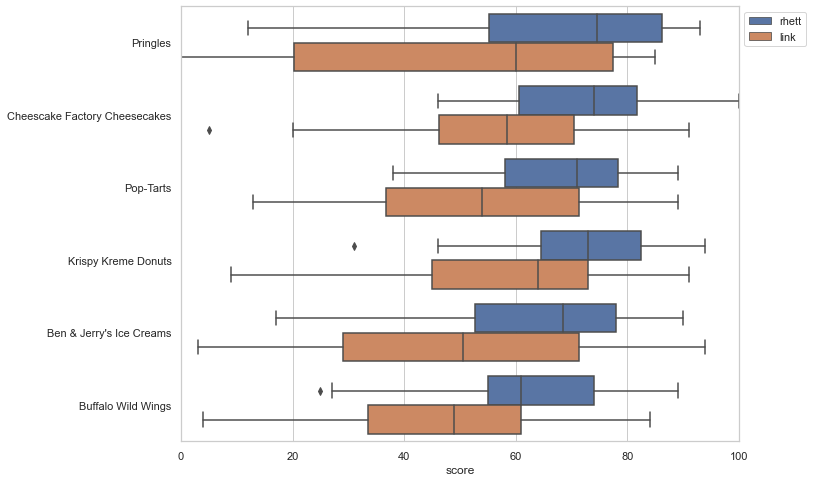

In [169]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_long, x='score', y='product', hue='person', ax=ax)
ax.set(ylabel='', xlim=(0, 100))
ax.legend(bbox_to_anchor=(1,1));

Both their scores *are* correlated so, somehow between Link's pickiness and Rhett's undiscriminatory love for food, they happen to rank properly (for the most part lol).

Although looking at the bottom right part of the chart it looks like there are things Rhett scores high and Link scores low but very few that go the other way around (notice empty top right side of chart). 

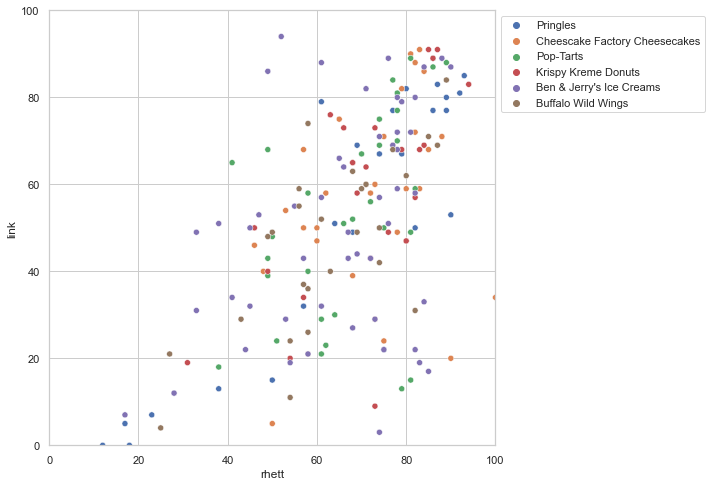

In [168]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='rhett', y='link', hue='product', ax=ax)
ax.set(xlim=(0,100), ylim=(0,100))
ax.legend(bbox_to_anchor=(1,1));

### Item level

The conspiracy is true after all. Most of the top 10 scored items (sweet ones atleast) are either chocolate or peanut butter.

In [159]:
df.loc[df['total'].nlargest(10).index].sort_values('total', ascending=False)

product            category  \
3                         Pringles             Classic   
103            Krispy Kreme Donuts              Filled   
82                       Pop-Tarts           Specialty   
97             Krispy Kreme Donuts  Glazed and/or Iced   
140       Ben & Jerry's Ice Creams       Peanut Butter   
141       Ben & Jerry's Ice Creams       Peanut Butter   
90             Krispy Kreme Donuts  Glazed and/or Iced   
88                       Pop-Tarts           Specialty   
92             Krispy Kreme Donuts  Glazed and/or Iced   
35   Cheescake Factory Cheesecakes           Chocolate   

                                      name  rhett  link  total  
3                   Cheddar and Sour Cream     93    85    178  
103         Chocolate Iced Custard Filling     87    91    178  
82                    Crisps: Blueberrific     89    88    177  
97                   Glazed Chocolate Cake     94    83    177  
140                    Peanut Butter World     90    87    177  
141               Peanut Butter Half Baked     88    89    177  
90                         Original Glazed     85    91    176  
88                                 S'mores     86    89    175  
92                   Chocolate Iced Glazed     86    89    175  
35   Adam's Peanut Butter Cup Fudge Ripple     83    91    174

The lowest scored ones are pretty straightforward. Pringles "Light" got done dirty here though lol.

In [160]:
df.loc[df['total'].nsmallest(10).index].sort_values('total', ascending=True)

product            category  \
23                   Pringles             "Light"   
22                   Pringles             "Light"   
7                    Pringles                Wavy   
154  Ben & Jerry's Ice Creams           Wild Card   
165        Buffalo Wild Wings                Mild   
21                   Pringles  "Extra" Flavourful   
131  Ben & Jerry's Ice Creams              Coffee   
162  Ben & Jerry's Ice Creams           Wild Card   
169        Buffalo Wild Wings                Mild   
95        Krispy Kreme Donuts  Glazed and/or Iced   

                               name  rhett  link  total  
23             Reduced Fat Original     12     0     12  
22          Lightly Salted Original     18     0     18  
7          Applewood Smoked Cheddar     17     5     22  
154                   Urban Bourbon     17     7     24  
165                           Plain     25     4     29  
21                Wendy's Baconator     23     7     30  
131              Chillin' the Roast     28    12     40  
162                         Cannoli     28    12     40  
169                        Teriyaki     27    21     48  
95   Strawberry Iced with Sprinkles     31    19     50

Looking at Rhett's lowest scores they seem pretty normal. This means that they both agreed these were bad.

In [161]:
df.loc[df['rhett'].nsmallest(10).index].sort_values('rhett', ascending=True)

product            category  \
23                   Pringles             "Light"   
7                    Pringles                Wavy   
154  Ben & Jerry's Ice Creams           Wild Card   
22                   Pringles             "Light"   
21                   Pringles  "Extra" Flavourful   
165        Buffalo Wild Wings                Mild   
169        Buffalo Wild Wings                Mild   
131  Ben & Jerry's Ice Creams              Coffee   
162  Ben & Jerry's Ice Creams           Wild Card   
95        Krispy Kreme Donuts  Glazed and/or Iced   

                               name  rhett  link  total  
23             Reduced Fat Original     12     0     12  
7          Applewood Smoked Cheddar     17     5     22  
154                   Urban Bourbon     17     7     24  
22          Lightly Salted Original     18     0     18  
21                Wendy's Baconator     23     7     30  
165                           Plain     25     4     29  
169                        Teriyaki     27    21     48  
131              Chillin' the Roast     28    12     40  
162                         Cannoli     28    12     40  
95   Strawberry Iced with Sprinkles     31    19     50

Surprisingly looking at Link's individual lowest scores most of them are the same as Ehtt's lowest. 

In [162]:
df.loc[df['link'].nsmallest(10).index].sort_values('link', ascending=True)

product            category  \
22                        Pringles             "Light"   
23                        Pringles             "Light"   
127       Ben & Jerry's Ice Creams             Vanilla   
165             Buffalo Wild Wings                Mild   
7                         Pringles                Wavy   
50   Cheescake Factory Cheesecakes       Miscellaneous   
21                        Pringles  "Extra" Flavourful   
154       Ben & Jerry's Ice Creams           Wild Card   
109            Krispy Kreme Donuts              Filled   
191             Buffalo Wild Wings                Wild   

                            name  rhett  link  total  
22       Lightly Salted Original     18     0     18  
23          Reduced Fat Original     12     0     12  
127             Ice Cream Sammie     74     3     77  
165                        Plain     25     4     29  
7       Applewood Smoked Cheddar     17     5     22  
50         Celebration Cheescake     50     5     55  
21             Wendy's Baconator     23     7     30  
154                Urban Bourbon     17     7     24  
109                Chocolate Bar     73     9     82  
191  New Blazin' Carolina Reaper     54    11     65

The one's where they both disagreed the most are very obvious for anyone who watched the show. Citrus is obviously prominent in this list (I'm sure tomatoes would have been too if these gut checks included those). This list also includes the Lemon Raspberry Cream cheesecake which Rhett just gave a 100 because he knew Link would bomb it lol.  

In [163]:
df.loc[(df['rhett'] - df['link']).nlargest(10).index]

product    category                      name  \
127       Ben & Jerry's Ice Creams     Vanilla          Ice Cream Sammie   
38   Cheescake Factory Cheesecakes       Fruit                  Key Lime   
136       Ben & Jerry's Ice Creams       Fruit             Cherry Garcia   
43   Cheescake Factory Cheesecakes       Fruit     Lemon Raspberry Cream   
76                       Pop-Tarts  Chocolatey         Pretzel Chocolate   
84                       Pop-Tarts   Specialty    Pretzel Cinnamon Sugar   
109            Krispy Kreme Donuts      Filled             Chocolate Bar   
121       Ben & Jerry's Ice Creams   Chocolate         Minter Wonderland   
133       Ben & Jerry's Ice Creams      Coffee  Coffee Toffee Bar Crunch   
0                         Pringles     Classic                  Original   

     rhett  link  total  
127     74     3     77  
38      90    20    110  
136     85    17    102  
43     100    34    134  
76      81    15     96  
84      79    13     92  
109     73     9     82  
121     83    19    102  
133     82    22    104  
0       75    22     97

### Exrteme cases

Rhett has been very clear about what his scale means, specifically that he will not rate anything below 50 unless he actually dislikes it. I'm going to check witha threshold of 40 to remove borderline cases. 

In [164]:
df[df['rhett'] < 40].sort_values('rhett')

product            category  \
23                   Pringles             "Light"   
7                    Pringles                Wavy   
154  Ben & Jerry's Ice Creams           Wild Card   
22                   Pringles             "Light"   
21                   Pringles  "Extra" Flavourful   
165        Buffalo Wild Wings                Mild   
169        Buffalo Wild Wings                Mild   
131  Ben & Jerry's Ice Creams              Coffee   
162  Ben & Jerry's Ice Creams           Wild Card   
95        Krispy Kreme Donuts  Glazed and/or Iced   
147  Ben & Jerry's Ice Creams           Wild Card   
164  Ben & Jerry's Ice Creams           Wild Card   
8                    Pringles                Wavy   
78                  Pop-Tarts           Specialty   
155  Ben & Jerry's Ice Creams           Wild Card   

                               name  rhett  link  total  
23             Reduced Fat Original     12     0     12  
7          Applewood Smoked Cheddar     17     5     22  
154                   Urban Bourbon     17     7     24  
22          Lightly Salted Original     18     0     18  
21                Wendy's Baconator     23     7     30  
165                           Plain     25     4     29  
169                        Teriyaki     27    21     48  
131              Chillin' the Roast     28    12     40  
162                         Cannoli     28    12     40  
95   Strawberry Iced with Sprinkles     31    19     50  
147             Everything but the…     33    31     64  
164                 Justice Remix'd     33    49     82  
8                    Classic Salted     38    13     51  
78                 Confetti Cupcake     38    18     56  
155    Boom Chocolatta! Cookie Core     38    51     89

While rare there are times when Link scores higher than Rhett. Overall Rhett scores 15 points higher than Link but these items got the same degree of preference from Link. 

In [165]:
df[(df['link'] - df['rhett']) > 15].sort_values('link', ascending=False)

product            category                      name  \
149  Ben & Jerry's Ice Creams           Wild Card             Cinnamon Buns   
138  Ben & Jerry's Ice Creams               Fruit  Red, White and Blueberry   
151  Ben & Jerry's Ice Creams           Wild Card         Oat of this World   
15                   Pringles  "Extra" Flavourful                     Pizza   
190        Buffalo Wild Wings                Wild               Desert Heat   
77                  Pop-Tarts           Specialty             Cinnamon Roll   
74                  Pop-Tarts          Chocolatey           Chocolate Fudge   
164  Ben & Jerry's Ice Creams           Wild Card           Justice Remix'd   

     rhett  link  total  
149     52    94    146  
138     61    88    149  
151     49    86    135  
15      61    79    140  
190     58    74    132  
77      49    68    117  
74      41    65    106  
164     33    49     82

### Taste during during an episode

The difficulty both were having at the end of the cheescake episode made me think if their scores changed as the episode went on longer. 

- Ther is a slight downward trend in teh Ben & Jerry's episode.
- Buffalo wings actually goes upward except the Carolina Reaper at the end.
- Even though this was the inspiration for this analysis the Cheesecake Factory episode is pretty consistent. The dip is the citruses. 
- The dip for Krispy Kreme near the beginning is 2 back to back strawberry donuts.
- Pop-Tarts is super consistent
- Pringles looks strange but the two dips are the wavy and "light" categories. The rest is pretty normal. 

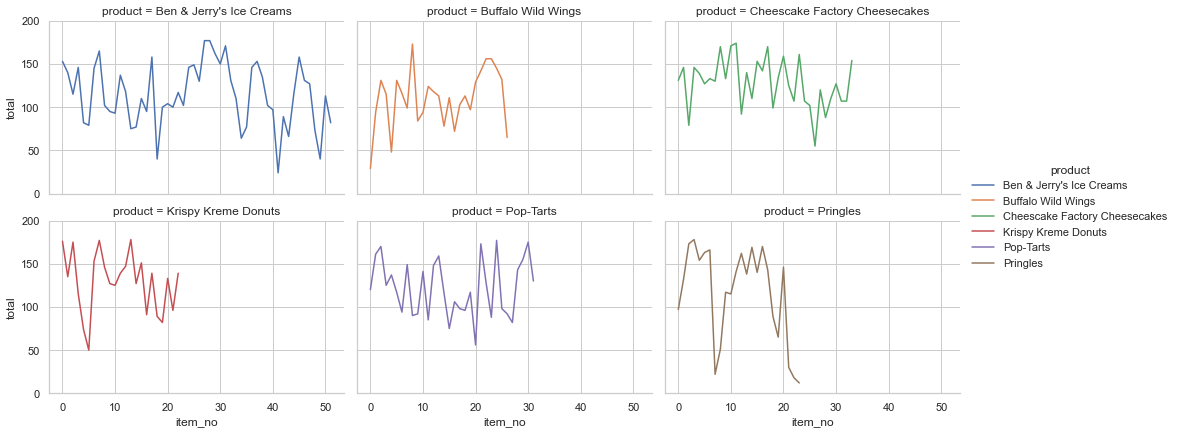

In [166]:
g = sns.relplot(data=df_with_item_no,
                kind='line',
                x='item_no', y='total', hue='product', col='product', col_wrap=3,
                aspect=1.5, height=3)
g.set(ylim=(0, 200));

Apart from the disagreements (that are more clearly seen in a previous section) the breakdown by person tells the same story. 

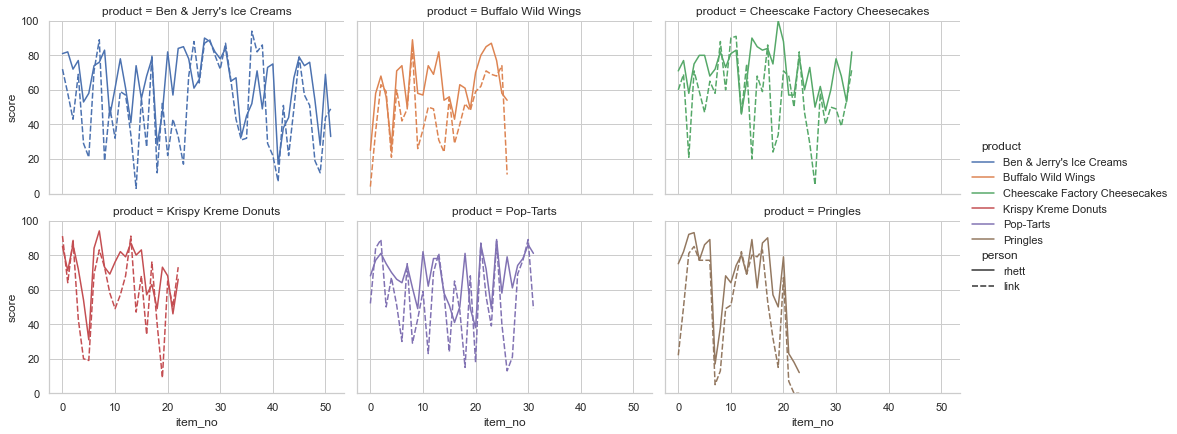

In [167]:
g = sns.relplot(data=df_with_item_no_long,
                kind='line',
                x='item_no', y='score', hue='product', col='product', col_wrap=3, style='person',
                aspect=1.5, height=3)
g.set(ylim=(0, 100));